# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel
from utils.thrombolysis_outcome_model import OutcomeModel

## Create data for models

See 'data' folder for processing of raw data.

In [2]:
data_processor = DataProcess(
    year_min=2016,
    year_max=2021,
    limit_to_ambo=False,
)

data_processor.run()

All rows: 358925, ML rows:132426, Fraction: 0.37


## Model Run

In [3]:
run_model = True

if run_model:
    # Descriptive statistics
    ds = DescriptiveStatistics()
    #ds.run()
    
    # Thrombolysis decision model
    thrombolysis_choice_model = ThrombolysisChoiceModel()
    #thrombolysis_choice_model.run()

    # Outcome model
    outcome_model = OutcomeModel()
    outcome_model.run()

    # Pathway simulation
    
    """
    pathway = Pathway(
        data_processor.pathway_simulation_parameters,
        thrombolysis_choice_model.benchmark_thrombolysis,
        trials=100)
    pathway.run()
    """

Outcome multiclass ROC AUC 0.797


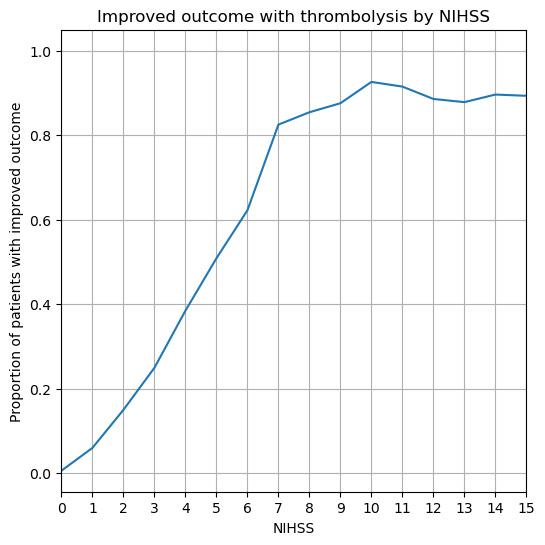

In [35]:
outcome_model.all_patients_outcomes.head()

# average of improved outcomes by stroke_severity
outcome_by_NIHSS = outcome_model.all_patients_outcomes.groupby('stroke_severity')['improved_outcome'].mean()
# plot outcome_by_NIHSS
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(outcome_by_NIHSS.index, outcome_by_NIHSS.values)
ax.set_xlabel('NIHSS')
ax.set_ylabel('Proportion of patients with improved outcome')
ax.set_title('Improved outcome with thrombolysis by NIHSS')
ax.set_xlim(0,15)
ax.set_xticks(np.arange(0, 16, 1))
ax.grid()
plt.show()





stroke_severity
0    0.006276
1    0.060213
2    0.150202
3    0.249759
4    0.384819
5    0.508764
Name: improved_outcome, dtype: float64

In [5]:
outcome_model.all_patients_outcomes_untreated_weighted_mrs.mean()

2.668697797532206

In [6]:
outcome_model.all_patients_outcomes_treated_weighted_mrs.mean()


2.531549114275733

In [7]:
outcome_model.all_patients_outcomes_improved.mean()

0.560061707233459

(array([  25.,   41.,   33.,   45.,   56.,   66.,   88.,  103.,  109.,
         166.,  221.,  324.,  330.,  480.,  628.,  760., 1019., 1266.,
        1591., 1989., 2409., 2932., 3450., 3997., 4705., 5387., 6062.,
        7263., 7919., 8355., 6520., 4608., 3528., 2553., 1885., 1371.,
        1101.,  834.,  646.,  539.,  418.,  320.,  233.,  219.,  183.,
         128.,   82.,   64.,   53.,   43.,   60.,   24.,   30.,   24.,
          22.,   21.,   11.,   13.,   15.,   12.]),
 array([-1.50000000e+00, -1.45000000e+00, -1.40000000e+00, -1.35000000e+00,
        -1.30000000e+00, -1.25000000e+00, -1.20000000e+00, -1.15000000e+00,
        -1.10000000e+00, -1.05000000e+00, -1.00000000e+00, -9.50000000e-01,
        -9.00000000e-01, -8.50000000e-01, -8.00000000e-01, -7.50000000e-01,
        -7.00000000e-01, -6.50000000e-01, -6.00000000e-01, -5.50000000e-01,
        -5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
        -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.5000

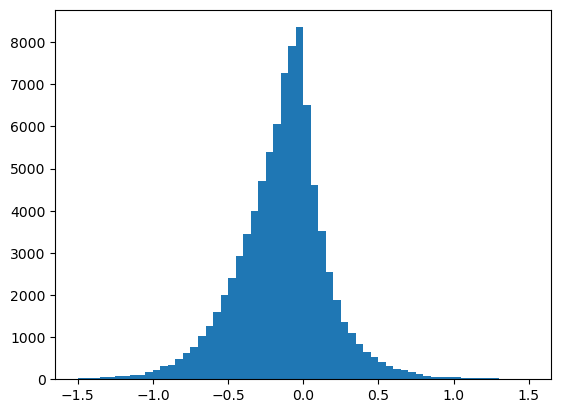

In [8]:
diff = outcome_model.all_patients_outcomes_treated_weighted_mrs - outcome_model.all_patients_outcomes_untreated_weighted_mrs
# Plot histogram of difference in mRS
plt.hist(diff, bins=np.arange(-1.5,1.51,0.05))

In [9]:
outcome_model.all_patients_outcomes_treated[:, 0:5].sum(axis=1)

array([0.9733538 , 0.9641791 , 0.98894864, ..., 0.9399891 , 0.98013264,
       0.9329961 ], dtype=float32)

In [10]:
outcome_model.all_patients_outcomes_treated[:, 0:5]

array([[0.04707869, 0.52822185, 0.10544174, 0.26543638, 0.02717513],
       [0.02007941, 0.5699026 , 0.06927926, 0.26863292, 0.03628487],
       [0.38905227, 0.33348364, 0.20461988, 0.04631062, 0.01548225],
       ...,
       [0.02264534, 0.36340955, 0.32741952, 0.14295469, 0.08355997],
       [0.3528963 , 0.28261948, 0.29511008, 0.02689427, 0.02261243],
       [0.10906751, 0.41563556, 0.29812783, 0.07753398, 0.03263122]],
      dtype=float32)

## Reporting

In [11]:
report = GlobalReport()
report.create_report()